<a href="https://colab.research.google.com/github/Davioliveira1305/LBI/blob/main/LBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Libs Necessárias
import graphviz as gp
import matplotlib.pyplot as plt
from IPython.display import Image
import itertools
from itertools import product

In [2]:
# Variáveis Globais do Problema
global var, lista_pesos, lista_pesos_restr, capacidade
var = int(input('Diga-me quantas variavéis de decisão possui seu problema da mochila 0-1: '))
lista_pesos = []
for i in range(var):
  peso = int(input(f'Informe o peso da variável x{i + 1} na função objetivo: '))
  lista_pesos.append(peso)
lista_pesos_restr = []
for i in range(var):
  peso_restr = int(input(f'Informe o peso da variável x{i + 1} na restrição: '))
  lista_pesos_restr.append(peso_restr)
capacidade = int(input('Informe a capacidade da mochila: '))

Diga-me quantas variavéis de decisão possui seu problema da mochila 0-1: 4
Informe o peso da variável x1 na função objetivo: 10
Informe o peso da variável x2 na função objetivo: 6
Informe o peso da variável x3 na função objetivo: 12
Informe o peso da variável x4 na função objetivo: 7
Informe o peso da variável x1 na restrição: 4
Informe o peso da variável x2 na restrição: 2
Informe o peso da variável x3 na restrição: 6
Informe o peso da variável x4 na restrição: 3
Informe a capacidade da mochila: 10


In [34]:
# Função de transição entre um estado e outro.
def funcao_tran(estado, xi, i):
  valor_estado = estado + xi * lista_pesos_restr[i]
  if valor_estado <= capacidade: return True, valor_estado
  return False, 0

In [35]:
# Objeto Nó do Grafo
class No:
  def __init__(self, estado, id):
    self.estado = estado
    self.id = id
    self.pai = None
  def __str__(self):
    return f'{self.estado}'
  def __repr__(self) -> str:
    return f'{self.estado}'

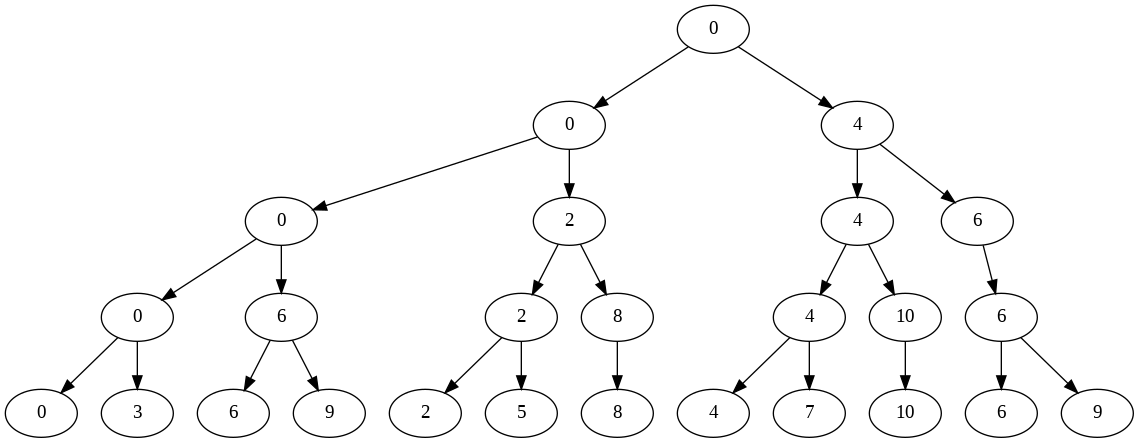

In [36]:
# Algoritmo propriamente dito
grafo = gp.Digraph(comment = 'DD')
raiz = No(0, '0')
grafo.node('0')
Lista_camadas = [[raiz]]
dominio = [0, 1]
lista_edges = []
id = 1
for i in range(0, var):
  lj = list()
  for j, xi in product(Lista_camadas[i], dominio):
      estado, valor_estado = funcao_tran(j.estado, xi, i)
      if estado:
        node = No(valor_estado, str(id))
        node.pai = j
        grafo.node(name=str(id), label=str(valor_estado))
        grafo.edge(j.id, node.id)
        lj.append(node)
        id += 1
  Lista_camadas.append(lj)

filename = grafo.render(filename = 'graph', format = 'png', view = False)
Image(filename)


In [ ]:
m = node(4)

TypeError: 'node' object is not callable